<a href="https://colab.research.google.com/github/delowarshizar/Practice/blob/main/week5_1453_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


In [3]:
import networkx as nx
from matplotlib import pyplot as plt


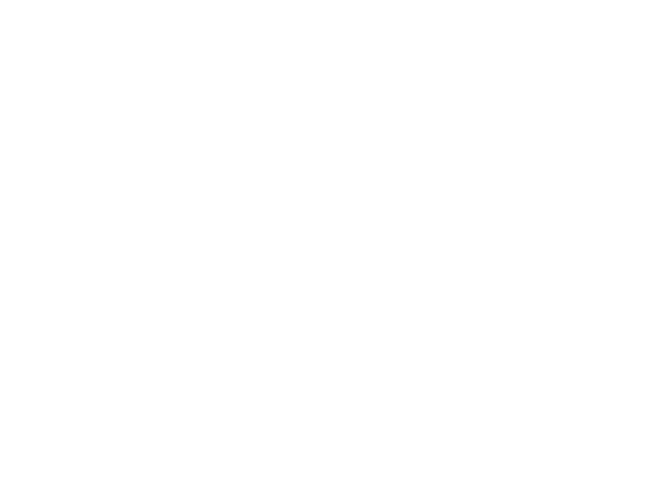

In [4]:
G = nx.Graph()
DG = nx.DiGraph()

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

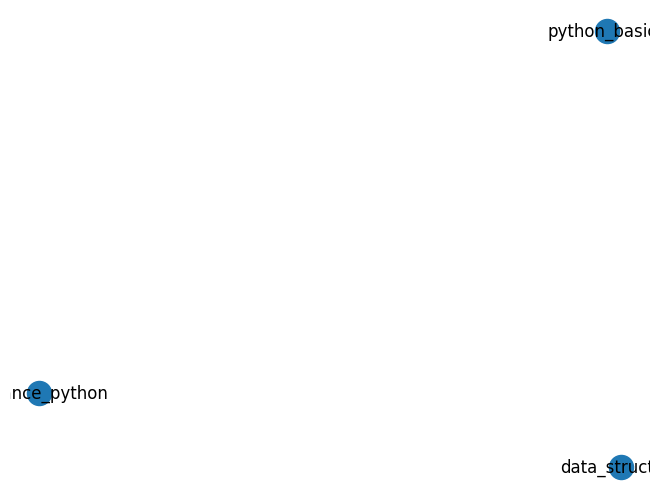

In [5]:
G.add_node('python_basics')
G.add_nodes_from(['data_structure','advance_python'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

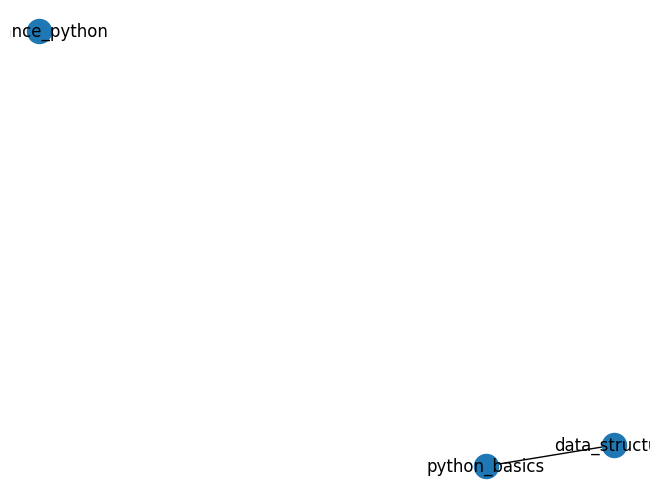

In [6]:
G.add_edge('python_basics','data_structure')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

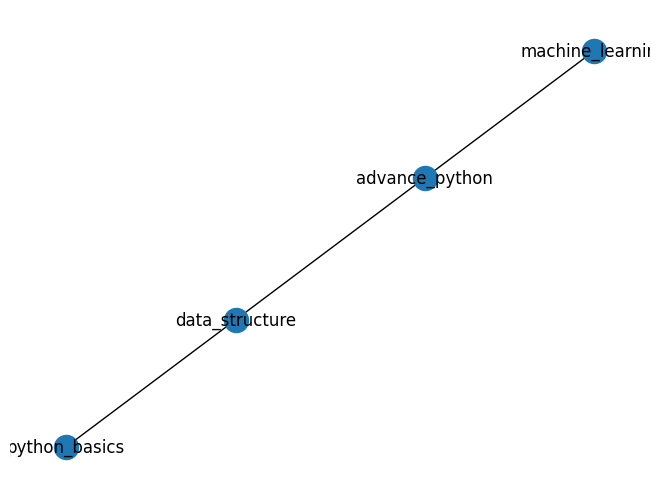

In [7]:
G.add_edges_from([('data_structure','advance_python'),('advance_python','machine_learning')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

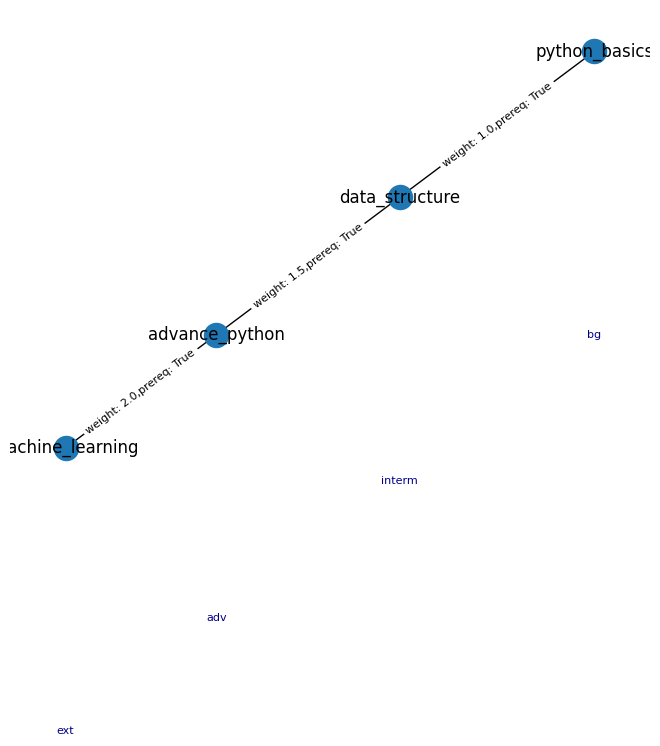

In [8]:
topics = {
    'python_basics': {'diff':'bg','des':'bsc_python'},
    'data_structure': {'diff':'interm','des':'data_str in python'},
    'advance_python':{'diff':'adv','des':'adv python basics'},
    'machine_learning':{'diff':'ext','des':'intro to ml'}

}

for node, attrs in topics.items():
    G.nodes[node].update(attrs)

edge_attributes = [
    (('python_basics','data_structure'), {'weight':1.0,'pre': True}),
    (('data_structure','advance_python'), {'weight':1.5,'pre': True}),
    (('advance_python','machine_learning'), {'weight':2.0,'pre': True})

]

for edge, attrs in edge_attributes:
    G.edges[edge].update(attrs)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

node_labels = {node: data['diff'] for node, data in G.nodes(data=True)}
for node, (x,y) in pos.items():
    plt.text(x,y - 0.05, node_labels[node], fontsize=8, ha='center', color='darkblue')


edge_labels = {(u,v): f"weight: {d['weight']},prereq: {d['pre']}"
for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=8)

plt.show()

apply bfs on indian-cities-dataset.csv(take only first 10 rows) and display graph using difference node color and with short edge

/tmp/ipython-input-12-2818496212.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes())) # Using a colormap for variation


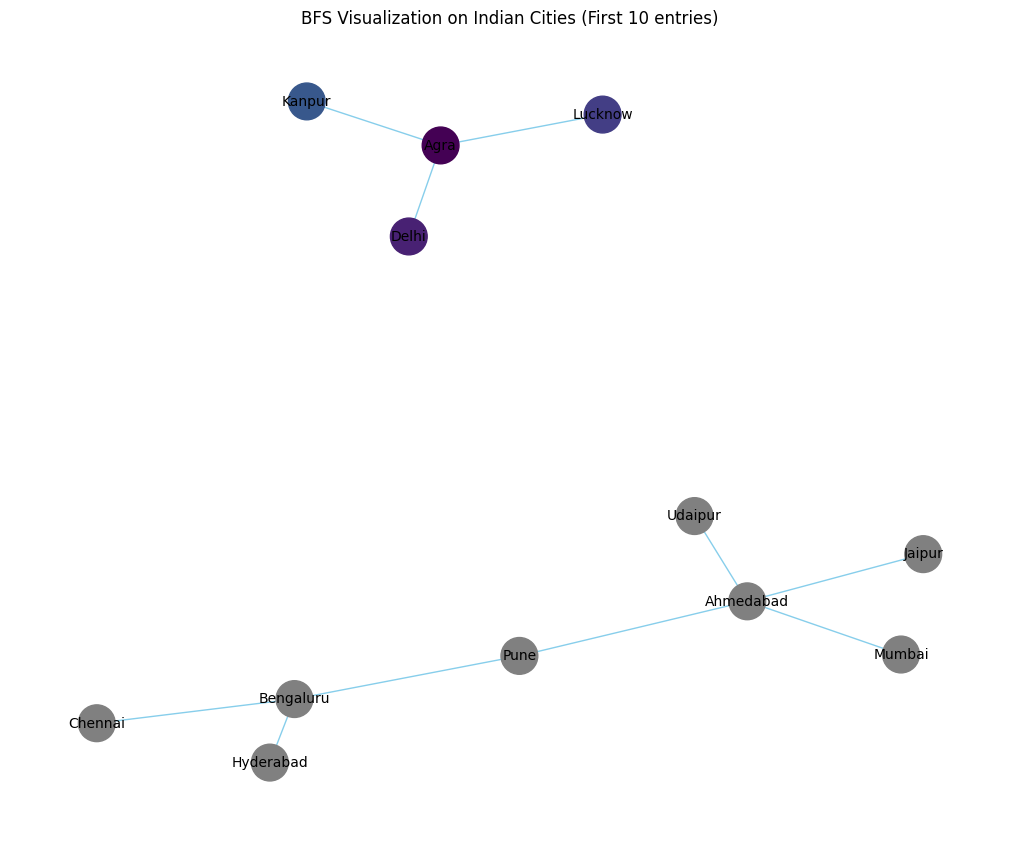

In [12]:
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('/content/drive/MyDrive/Dataset/indian-cities-dataset.csv')

G_bfs = nx.Graph()

for i in range(min(10, len(df))):
    origin_city = df.loc[i, 'Origin']
    destination_city = df.loc[i, 'Destination']
    G_bfs.add_node(origin_city)
    G_bfs.add_node(destination_city)
    G_bfs.add_edge(origin_city, destination_city)


if G_bfs.nodes():
    start_node = df.loc[0, 'Origin']
    visited = set()
    queue = deque([start_node])
    node_colors = {}
    bfs_order = []

    color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes())) # Using a colormap for variation
    color_index = 0

    while queue:
        current_node = queue.popleft()
        if current_node not in visited:
            visited.add(current_node)
            bfs_order.append(current_node)
            node_colors[current_node] = color_map(color_index)
            color_index += 1
            for neighbor in G_bfs.neighbors(current_node):
                if neighbor not in visited:
                    queue.append(neighbor)

    node_color_list = [node_colors.get(node, 'gray') for node in G_bfs.nodes()] # Default to gray for unvisited

    pos_bfs = nx.spring_layout(G_bfs, k=0.5)  # Use smaller k for shorter edges
    plt.figure(figsize=(10, 8))
    nx.draw(G_bfs, pos_bfs, with_labels=True, node_color=node_color_list, node_size=700, font_size=10, edge_color='skyblue')
    plt.title("BFS Visualization on Indian Cities (First 10 entries)")
    plt.show()
else:
    print("Graph is empty. Could not perform BFS or drawing.")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-13-2451351082.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes()))
/tmp/ipython-input-13-2451351082.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


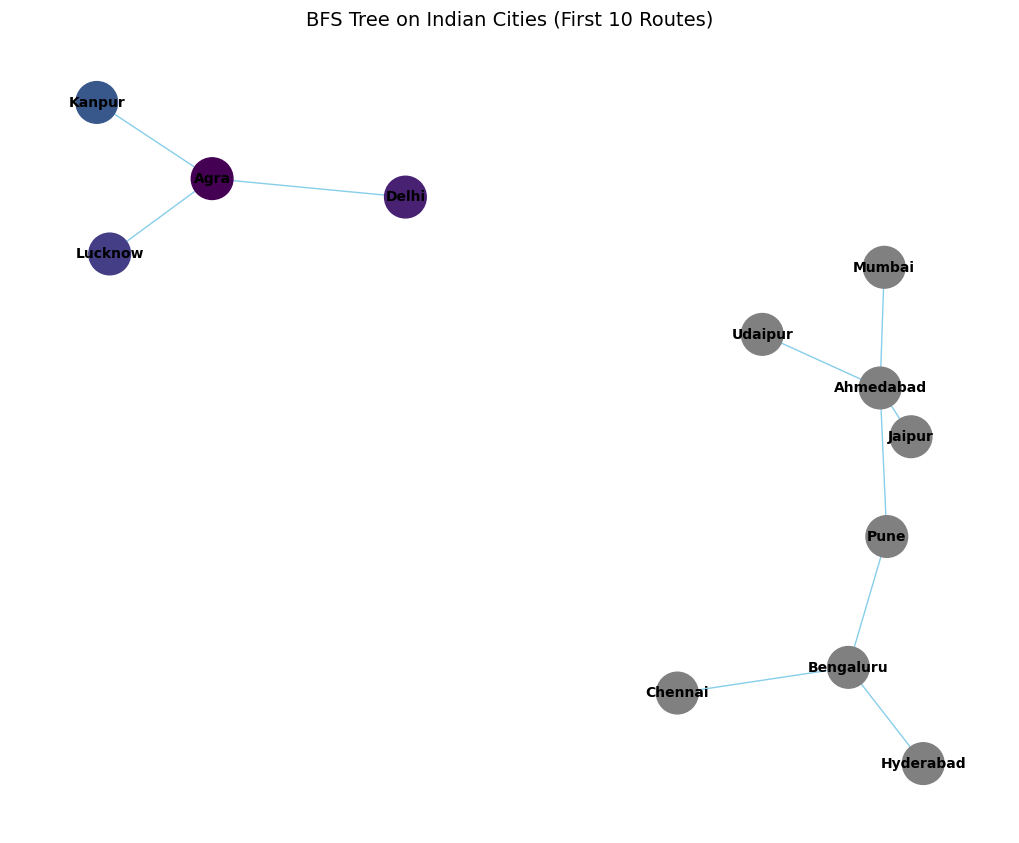

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/indian-cities-dataset.csv')

# Create an undirected graph
G_bfs = nx.Graph()

# Add nodes and edges from first 10 rows
for i in range(min(10, len(df))):
    origin = df.loc[i, 'Origin']
    destination = df.loc[i, 'Destination']
    if pd.notna(origin) and pd.notna(destination):  # Check for valid data
        G_bfs.add_edge(origin.strip(), destination.strip())

# Check if graph has nodes
if G_bfs.number_of_nodes() == 0:
    print("Graph is empty. No valid city data found.")
else:
    # BFS traversal setup
    start_node = df.loc[0, 'Origin'].strip()
    visited = set()
    queue = deque([start_node])
    node_colors = {}
    bfs_order = []

    # Use a colormap to color each node based on visit order
    color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes()))
    color_index = 0

    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            bfs_order.append(current)
            node_colors[current] = color_map(color_index)
            color_index += 1
            for neighbor in G_bfs.neighbors(current):
                if neighbor not in visited:
                    queue.append(neighbor)

    # Assign color to all nodes, defaulting to gray for unvisited ones
    node_color_list = [node_colors.get(node, 'gray') for node in G_bfs.nodes()]

    # Draw the graph
    pos = nx.spring_layout(G_bfs, k=0.45, seed=42)  # Spring layout with short edges

    plt.figure(figsize=(10, 8))
    nx.draw(
        G_bfs,
        pos,
        with_labels=True,
        node_color=node_color_list,
        node_size=900,
        edge_color='skyblue',
        font_size=10,
        font_weight='bold'
    )

    # Optional: Show edge labels (like distance, if available)
    # edge_labels = {(u, v): f"{G_bfs[u][v].get('weight', '')}" for u, v in G_bfs.edges()}
    # nx.draw_networkx_edge_labels(G_bfs, pos, edge_labels=edge_labels, font_size=8)

    plt.title("BFS Tree on Indian Cities (First 10 Routes)", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-15-771794535.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes()))
/tmp/ipython-input-15-771794535.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


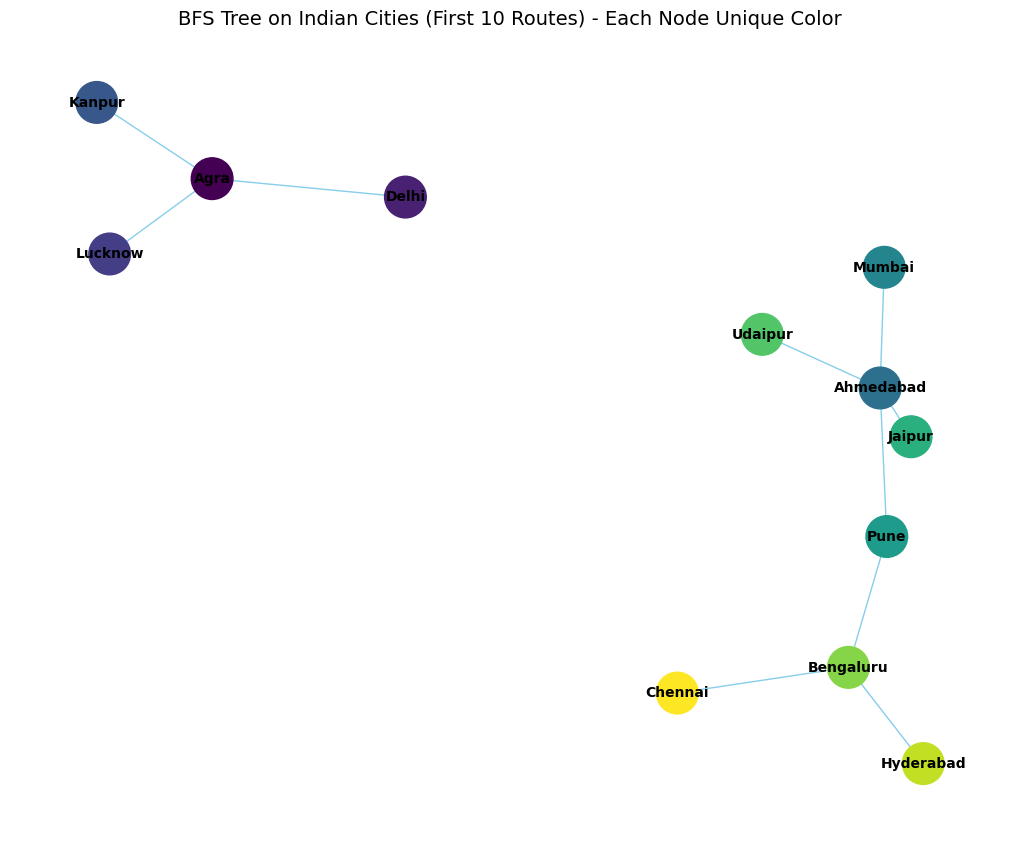

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/indian-cities-dataset.csv')

# Create an undirected graph
G_bfs = nx.Graph()

# Add nodes and edges from first 10 rows
for i in range(min(10, len(df))):
    origin = df.loc[i, 'Origin']
    destination = df.loc[i, 'Destination']
    if pd.notna(origin) and pd.notna(destination):  # Check for valid data
        G_bfs.add_edge(origin.strip(), destination.strip())

# Check if graph has nodes
if G_bfs.number_of_nodes() == 0:
    print("Graph is empty. No valid city data found.")
else:
    # BFS traversal setup (just for starting node; not used in coloring)
    start_node = df.loc[0, 'Origin'].strip()
    visited = set()
    queue = deque([start_node])

    # BFS just to visit nodes (optional, you can skip if only unique colors needed)
    while queue:
        current = queue.popleft()
        if current not in visited:
            visited.add(current)
            for neighbor in G_bfs.neighbors(current):
                if neighbor not in visited:
                    queue.append(neighbor)

    # Assign a unique color to each node (all nodes have different colors)
    color_map = plt.cm.get_cmap('viridis', len(G_bfs.nodes()))
    node_color_list = [color_map(i) for i, node in enumerate(G_bfs.nodes())]

    # Draw the graph
    pos = nx.spring_layout(G_bfs, k=0.45, seed=42)  # Spring layout with short edges

    plt.figure(figsize=(10, 8))
    nx.draw(
        G_bfs,
        pos,
        with_labels=True,
        node_color=node_color_list,
        node_size=900,
        edge_color='skyblue',
        font_size=10,
        font_weight='bold'
    )

    plt.title("BFS Tree on Indian Cities (First 10 Routes) - Each Node Unique Color", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

